In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
plt.rcParams["font.family"] = 'Arial Unicode MS'
plt.rcParams['axes.unicode_minus']=False
from sklearn.datasets import load_wine

In [360]:
data1 = pd.read_csv('/Users/yangzhou/R语言/统计分析/SZ#000001.txt',sep = '\t',encoding='gbk',header=1) # 平安银行

In [361]:
data1

,日期,开盘,最高,最低,收盘,成交量,成交额
0,2021/07/22,20.45,20.66,20.24,20.38,86864809.0,1.773999e+09
1,2021/07/23,20.38,20.38,20.00,20.10,72740433.0,1.461468e+09
2,2021/07/26,19.96,19.99,18.43,18.80,145130394.0,2.770237e+09
3,2021/07/27,18.87,18.99,17.60,17.76,135755148.0,2.461708e+09
4,2021/07/28,17.85,18.07,17.68,17.75,106299421.0,1.898563e+09
...,...,...,...,...,...,...,...
136,2022/02/16,16.35,16.53,16.21,16.41,78239959.0,1.282234e+09
137,2022/02/17,16.39,16.55,16.32,16.42,79450184.0,1.306514e+09
138,2022/02/18,16.32,16.77,16.31,16.77,80249940.0,1.330233e+09
139,2022/04/08,16.28,16.28,16.28,16.28,0.0,0.000000e+00


In [362]:
data2 = pd.read_csv('/Users/yangzhou/R语言/统计分析/SH#600031.txt',sep='\t',encoding='gbk',header=1) # 三一重工

In [363]:
data2

,日期,开盘,最高,最低,收盘,成交量,成交额
0,2021/07/22,25.80,27.90,25.71,27.65,345683996.0,9.477014e+09
1,2021/07/23,27.72,28.59,27.33,27.37,250461455.0,6.981093e+09
2,2021/07/26,27.15,27.28,26.33,26.50,175358585.0,4.683601e+09
3,2021/07/27,26.78,26.96,25.05,25.10,180743177.0,4.666158e+09
4,2021/07/28,24.93,25.38,24.52,24.94,114037944.0,2.842062e+09
...,...,...,...,...,...,...,...
136,2022/02/16,20.92,21.00,20.68,20.82,50258999.0,1.047139e+09
137,2022/02/17,20.84,20.89,20.60,20.75,49515075.0,1.024836e+09
138,2022/02/18,20.55,20.90,20.49,20.89,58997368.0,1.220990e+09
139,2022/04/08,17.66,17.66,17.66,17.66,0.0,0.000000e+00


In [593]:
data = pd.concat([data1.iloc[:,[1,5]],data2.iloc[:,[1,5]]],axis=0)

In [594]:
data

,开盘,成交量
0,20.45,86864809.0
1,20.38,72740433.0
2,19.96,145130394.0
3,18.87,135755148.0
4,17.85,106299421.0
...,...,...
136,20.92,50258999.0
137,20.84,49515075.0
138,20.55,58997368.0
139,17.66,0.0


In [595]:
data.columns

Index(['    开盘', '    成交量'], dtype='object')

In [596]:
data = data.dropna()

In [597]:
data['label'] = [0 for _ in range(140)]+[1 for _ in range(140)]

/Users/yangzhou/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [598]:
data = data.reset_index(drop=True)

In [599]:
data

,开盘,成交量,label
0,20.45,86864809.0,0
1,20.38,72740433.0,0
2,19.96,145130394.0,0
3,18.87,135755148.0,0
4,17.85,106299421.0,0
...,...,...,...
275,20.40,57676212.0,1
276,20.92,50258999.0,1
277,20.84,49515075.0,1
278,20.55,58997368.0,1


In [600]:
# X = data.iloc[:,[0,1]]

Text(0.5, 1.0, '原始数据分布')

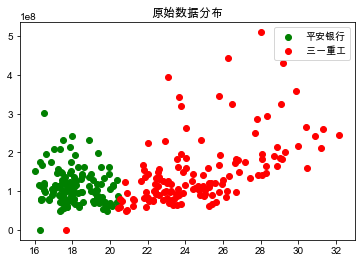

In [601]:
ax = plt.subplot(1,1,1)
ax.scatter(data[data.label==0].iloc[:,0],data[data.label==0].iloc[:,1],c = 'green',label = '平安银行')
ax.scatter(data[data.label==1].iloc[:,0],data[data.label==1].iloc[:,1],c = 'red',label = '三一重工')
ax.legend()
ax.set_title('原始数据分布')

In [513]:
# 计算评估指标
def evalution(centers,X):
    E_in_list = []
    for num,center in enumerate(centers):
        E_in_list.append((np.sum((X[X.iloc[:,-1]==num].iloc[:,[0,1]].values-np.median(X[X.iloc[:,-1]==num].iloc[:,[0,1]].values,axis=0))**2,axis=1).sum())/X[X.iloc[:,-1]==num].iloc[:,[0,1]].shape[0])
    E_in = np.array(E_in_list).sum()
    E_out = np.sum((centers-centers.mean(axis=0).reshape(-1,2))**2)/centers.shape[0]+1e-6
    return E_in/E_out

In [426]:
data = pd.DataFrame(columns=[0,1,2])

In [428]:
data[0] = [1,2,3]
data[1] = [4,5,6]
data[2] = [0,0,0]

In [489]:
centers = np.array([[1,2],[3,4]])

In [492]:
centers.mean(axis=0)

array([2., 3.])

In [490]:
np.sum((centers-centers.mean(axis=0).reshape(-1,1))**2)/centers.shape[0]

0.5

In [446]:
data

,开盘,成交量,label
0,20.45,86864809.0,0
1,20.38,72740433.0,0
2,19.96,145130394.0,0
3,18.87,135755148.0,0
4,17.85,106299421.0,0
...,...,...,...
275,20.40,57676212.0,1
276,20.92,50258999.0,1
277,20.84,49515075.0,1
278,20.55,58997368.0,1


In [433]:
np.sum(((data[data.iloc[:,-1]==0].iloc[:,[0,1]].values-np.median(data[data.iloc[:,-1]==0].iloc[:,[0,1]].values,axis=0))**2),axis=1).sum()/data[data.iloc[:,-1]==0].iloc[:,[0,1]].shape[0]

1.3333333333333333

In [536]:
evss = []
for i in range(10):
    kmeans_ = KMeans(n_clusters=i+1,init='random').fit(data.iloc[:,[0,1]])
    centers = kmeans_.cluster_centers_
    data['predict'] = kmeans_.predict(data.iloc[:,[0,1]])
    evss.append(evalution(centers,data))

In [537]:
evss

[5.329514545248637e+21,
 1.356685259488241,
 0.5033616544806874,
 0.5157889801346898,
 0.5322473679215861,
 0.5544284933742398,
 0.2170214340513542,
 0.4493686480068148,
 0.23766443695925935,
 0.5124314672245531]

In [560]:
evsss = []
for i in range(30):
    kmeans_ = KMeans(n_clusters=i+1,init='random',random_state=0).fit(data.iloc[:,[0,1]])
    centers = kmeans_.cluster_centers_
    data['predict'] = kmeans_.predict(data.iloc[:,[0,1]])
    evsss.append(evalution(centers,data))

In [561]:
evsss

[5.329514545248637e+21,
 1.356685259488241,
 0.6144140326516325,
 0.5183749031883231,
 0.5328914268824545,
 0.23710675151129745,
 0.21702143405135424,
 0.22505498671261287,
 0.2278208237223163,
 0.23894017160753545,
 0.2568691642868505,
 0.2084834594380413,
 0.21590363190450562,
 0.22633720507646443,
 0.23441021404045423,
 0.2492784175969798,
 0.2590485581846311,
 0.26773303737501863,
 0.27281005029851546,
 0.28422223241167116,
 0.2663810694498728,
 0.2776416868065053,
 0.28896387408287433,
 0.2943548761141205,
 0.29450546243702014,
 0.3051225943987222,
 0.3099239874752977,
 0.3198564161918027,
 0.32866792015130375,
 0.3164421814189567]

In [602]:
evsss

[5.329514545248637e+21,
 1.356685259488241,
 0.6144140326516325,
 0.5183749031883231,
 0.5328914268824545,
 0.23710675151129745,
 0.21702143405135424,
 0.22505498671261287,
 0.2278208237223163,
 0.23894017160753545,
 0.2568691642868505,
 0.2084834594380413,
 0.21590363190450562,
 0.22633720507646443,
 0.23441021404045423,
 0.2492784175969798,
 0.2590485581846311,
 0.26773303737501863,
 0.27281005029851546,
 0.28422223241167116,
 0.2663810694498728,
 0.2776416868065053,
 0.28896387408287433,
 0.2943548761141205,
 0.29450546243702014,
 0.3051225943987222,
 0.3099239874752977,
 0.3198564161918027,
 0.32866792015130375,
 0.3164421814189567]

In [605]:
evsss[11]

0.2084834594380413

Text(0.5, 1.0, 'EE值随着聚类数目K值[1，30]的变化')

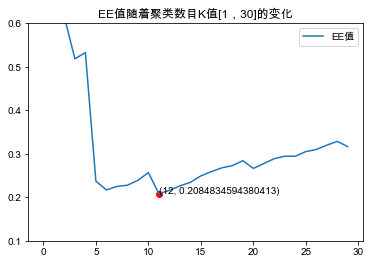

In [609]:
ax = plt.subplot(1,1,1)
ax.plot(evsss,label='EE值')
ax.annotate((12,evsss[11]),(11,evsss[11]),(11,evsss[11]))
ax.scatter(11,evsss[11],c='red')
ax.set_ylim(0.1,0.6)
ax.legend()
ax.set_title('EE值随着聚类数目K值[1，30]的变化')

In [591]:
evssss = []
for i in range(30):
    kmeans_ = KMeans(n_clusters=i+1,init='random').fit(data.iloc[:,[0,1]])
    centers = kmeans_.cluster_centers_
    data['predict'] = kmeans_.predict(data.iloc[:,[0,1]])
    evssss.append(evalution(centers,data))

In [592]:
evssss

[5.329514545248637e+21,
 1.356685259488241,
 0.6144140326516325,
 0.5183749031883231,
 0.5322473679215859,
 0.5278776221084646,
 0.5577568123878477,
 0.22446262490377442,
 0.2278810481200952,
 0.18996292646076193,
 0.20251319205556623,
 0.2073644117502179,
 0.1841972185021802,
 0.22271658201567618,
 0.23196326753428412,
 0.21907516111530154,
 0.183756892286872,
 0.25476590242040764,
 0.2549679814026924,
 0.09584849822590093,
 0.10063199027426892,
 0.2945439590144743,
 0.284167368748211,
 0.307151317949865,
 0.061853596196671384,
 0.35650094425209683,
 0.2602027345973647,
 0.2834756702465037,
 0.28938145690201866,
 0.3560106362264834]

In [473]:
np.sum((centers-centers.mean(axis=1).reshape(-1,1))**2)/centers.shape[0]

2.846774001762682e+16

In [470]:
centers.mean(axis=1).reshape(-1,1).shape

(5, 1)

In [410]:
evss

[5.329514545248637e+16,
 0.6783426297441205,
 0.1687417605236016,
 0.12959372579708076,
 0.10644947358431721,
 0.06923276722074777,
 0.03056127112696184,
 0.05617108100085187,
 0.052739532974057785,
 0.01884885123296887]

In [ ]:
# 计算评估指标
def evalution(centers,X):
    E_in_list = []
    for num,center in enumerate(centers):
        E_in_list.append(np.sum((X[X.iloc[:,-1]==num].iloc[:,[0,1]].values-center)**2)/X[X.iloc[:,-1]==num].iloc[:,[0,1]].shape[0])
    E_in = np.array(E_in_list).sum()
    E_out = np.sum((centers-centers.mean(axis=0))**2)+0.001
    return E_in/E_out

In [373]:
data

,开盘,成交量,label
0,20.45,86864809.0,0
1,20.38,72740433.0,0
2,19.96,145130394.0,0
3,18.87,135755148.0,0
4,17.85,106299421.0,0
...,...,...,...
275,20.40,57676212.0,1
276,20.92,50258999.0,1
277,20.84,49515075.0,1
278,20.55,58997368.0,1


In [389]:
ev = []
for i in range(10):
    kmeans_ = KMeans(n_clusters=i+1,init='random').fit(data.iloc[:,[0,1]])
    centers = kmeans_.cluster_centers_
    data['predict'] = kmeans_.predict(data.iloc[:,[0,1]])
    ev.append(evalution(centers,data))

In [390]:
ev

[5.050035745293029e+18,
 0.6216895265027623,
 0.1579632312770516,
 0.12191633731631608,
 0.09194635486483334,
 0.07518431419206098,
 0.030261706499663556,
 0.0476623217484002,
 0.023978172747731636,
 0.01845443441753847]

In [398]:
evs = []
for i in range(10):
    kmeans_ = KMeans(n_clusters=i+1,init='random').fit(data.iloc[:,[0,1]])
    centers = kmeans_.cluster_centers_
    data['predict'] = kmeans_.predict(data.iloc[:,[0,1]])
    evs.append(evalution(centers,data))

In [399]:
evs

[5.050035745293029e+18,
 0.6216895265027623,
 0.19360209123147826,
 0.12191633731631608,
 0.04684374124013255,
 0.07607244026642197,
 0.06540198966031918,
 0.027245635495671095,
 0.019794620920724926,
 0.04346425256068578]

(0.01, 0.1)

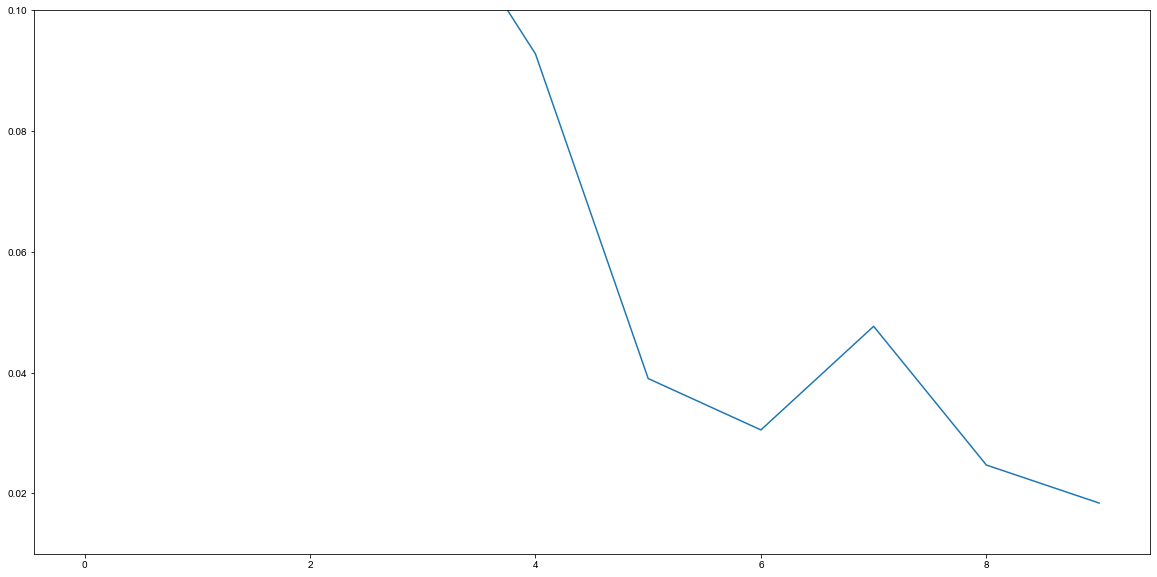

In [380]:
plt.figure(figsize=(20,10))
plt.plot(ev)
plt.ylim(0.01,0.1)

In [247]:
kmeans = KMeans(n_clusters=2,init='random',max_iter=1)

In [226]:
kmeans_ = kmeans.fit(data.iloc[:,[0,1]])

In [227]:
kmeans_.predict(data.iloc[:,[0,1]])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [228]:
kmeans_.cluster_centers_

array([[2.51676087e+01, 2.55110732e+08],
       [2.06550427e+01, 1.03862236e+08]])

In [229]:
# X['predict'] = kmeans_.predict(data.iloc[:,[0,1]])
data['predict'] = kmeans_.predict(data.iloc[:,[0,1]])

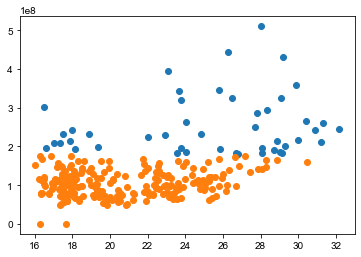

In [230]:
ax = plt.subplot(1,1,1)
for i in range(data['predict'].nunique()):
    ax.scatter(data[data.predict==i].iloc[:,0],data[data.predict==i].iloc[:,1])
#     ax.scatter(data[data.label==1].iloc[:,0],data[data.label==1].iloc[:,1],c = 'red')

In [231]:
data

,开盘,成交量,label,predict
0,20.45,86864809.0,0,1
1,20.38,72740433.0,0,1
2,19.96,145130394.0,0,1
3,18.87,135755148.0,0,1
4,17.85,106299421.0,0,1
...,...,...,...,...
275,20.40,57676212.0,1,1
276,20.92,50258999.0,1,1
277,20.84,49515075.0,1,1
278,20.55,58997368.0,1,1


In [232]:
# silhouette_score(X.iloc[:,[0,1]],X.iloc[:,-1])

# np.median(X[X.iloc[:,-1]==0].iloc[:,[0,1]].values,axis=0)

# X[X.iloc[:,-1]==1].iloc[:,[0,1]].values.mean(axis=0)

# kmeans_.cluster_centers_

In [610]:
def random_select_point(data):
    indexs = np.random.choice(data.index,2)
    return data.iloc[indexs,]

In [611]:
select_point = random_select_point(data)

In [613]:
select_point

,开盘,成交量,label
160,28.7,191840564.0,1
99,17.7,60236967.0,0


In [616]:
def select_init(data,select_point):
    dis = [np.sum((np.array(data.iloc[:,[0,1]])-point)**2,axis=1) for point in np.array(select_point.iloc[:,[0,1]])]
    datas = data.copy()
    datas['dis1'] = dis[0]
    datas['dis2'] = dis[1]
    datas['pre'] = (datas['dis1']>datas['dis2']).astype(int)
    dis1 = datas[datas['pre']==0].sort_values('dis1').loc[:,['    开盘', '    成交量','dis1']]
    dis2 = datas[datas['pre']==1].sort_values('dis2').loc[:,['    开盘', '    成交量','dis2']]
    dis1['p'] = sorted(dis1['dis1']/(dis1['dis1'].sum()),reverse=True)
    dis2['p'] = sorted(dis2['dis2']/(dis2['dis2'].sum()),reverse=True)
    # 按概率选择
    def random_pick(some_list, probabilities): 
        x = np.random.uniform(0,1) 
        cumulative_probability = 0.0 
        for item, item_probability in zip(some_list, probabilities): 
            cumulative_probability += item_probability 
            if x < cumulative_probability:
                break 
        return item
    center1 = dis1.loc[random_pick(dis1.index,dis1['p']),:]
    center2 = dis2.loc[random_pick(dis2.index,dis2['p']),:]
    return center1,center2

In [617]:
centers = select_init(data,select_point)

In [621]:
np.array(centers)[:,:2]

array([[1.8160000e+01, 1.9372089e+08],
       [2.3550000e+01, 6.5416366e+07]])

In [238]:
data

,开盘,成交量,label,predict
0,20.45,86864809.0,0,1
1,20.38,72740433.0,0,1
2,19.96,145130394.0,0,1
3,18.87,135755148.0,0,1
4,17.85,106299421.0,0,1
...,...,...,...,...
275,20.40,57676212.0,1,1
276,20.92,50258999.0,1,1
277,20.84,49515075.0,1,1
278,20.55,58997368.0,1,1


In [239]:
centers = np.array(centers)[:,:2]

In [240]:
kmeans_f = KMeans(n_clusters=2,init=centers,n_init=1).fit(data.iloc[:,[0,1]]).predict(data.iloc[:,[0,1]])

In [241]:
data['predict_f'] = kmeans_f

In [242]:
data

,开盘,成交量,label,predict,predict_f
0,20.45,86864809.0,0,1,1
1,20.38,72740433.0,0,1,1
2,19.96,145130394.0,0,1,1
3,18.87,135755148.0,0,1,1
4,17.85,106299421.0,0,1,1
...,...,...,...,...,...
275,20.40,57676212.0,1,1,1
276,20.92,50258999.0,1,1,1
277,20.84,49515075.0,1,1,1
278,20.55,58997368.0,1,1,1


In [243]:
(kmeans_f==data['predict']).sum()

280

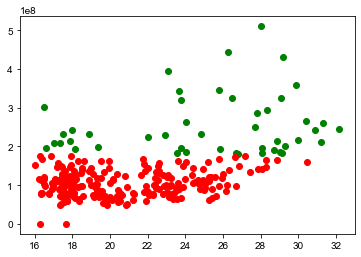

In [244]:
ax = plt.subplot(1,1,1)
ax.scatter(data[data.predict_f==0].iloc[:,0],data[data.predict_f==0].iloc[:,1],c = 'green')
ax.scatter(data[data.predict_f==1].iloc[:,0],data[data.predict_f==1].iloc[:,1],c = 'red')

In [245]:
(data['predict']==data['label']).mean()

0.40714285714285714

In [246]:
(data['predict_f']==data['label']).mean()

0.40714285714285714

In [626]:
def train():
    data1 = pd.read_csv('/Users/yangzhou/R语言/统计分析/SZ#000001.txt',sep = '\t',encoding='gbk',header=1) # 平安银行
    data2 = pd.read_csv('/Users/yangzhou/R语言/统计分析/SH#600031.txt',sep='\t',encoding='gbk',header=1) # 三一重工
    data = pd.concat([data1.iloc[:,[1,5]],data2.iloc[:,[1,5]]],axis=0)
    data = data.dropna()
    data['label'] = [0 for _ in range(140)]+[1 for _ in range(140)]
    data = data.reset_index(drop=True)
    color = ['blue','orange']
    ax = plt.subplot(1,1,1)
    for i in range(data['label'].nunique()):
        ax.scatter(data[data.label==i].iloc[:,0],data[data.label==i].iloc[:,1],c=color[i])
    plt.show()    
    
    kmeans = KMeans(n_clusters=2,init='random',max_iter=2)
    kmeans_ = kmeans.fit(data.iloc[:,[0,1]])
    data['predict'] = kmeans_.predict(data.iloc[:,[0,1]])
    ax = plt.subplot(1,1,1)
    for i in range(data['predict'].nunique()):
        ax.scatter(data[data.predict==i].iloc[:,0],data[data.predict==i].iloc[:,1],c=color[i])
    plt.show()
    
    select_point = random_select_point(data)
    centers = select_init(data,select_point)
    centers = np.array(centers)[:,:2]
    kmeans_f = KMeans(n_clusters=2,init=centers,n_init=1,max_iter=2).fit(data.iloc[:,[0,1]]).predict(data.iloc[:,[0,1]])
    data['predict_f'] = kmeans_f
    ax = plt.subplot(1,1,1)
    for i in range(data['predict_f'].nunique()):
        ax.scatter(data[data.predict_f==i].iloc[:,0],data[data.predict_f==i].iloc[:,1],c=color[i])
    plt.show()
    
    return (kmeans_f==data['predict']).sum(),(data['predict']==data['label']).mean(),(data['predict_f']==data['label']).mean()

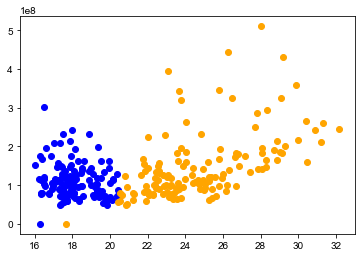

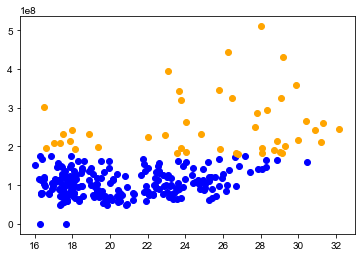

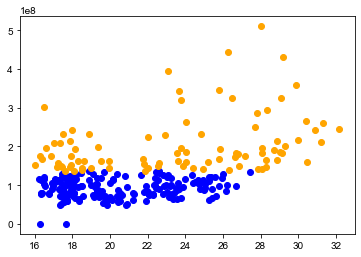

(236, 0.5928571428571429, 0.6)

In [627]:
train()

In [281]:
sorted(dis1['dis1']/(dis1['dis1'].sum()),reverse=True)

[0.05593221044803968,
 0.04500676773516834,
 0.041803947519928664,
 0.04155625372823,
 0.040471865475863074,
 0.03493501542110535,
 0.034887480964633934,
 0.03431019462752977,
 0.03406622504538372,
 0.026077084569587516,
 0.024946516118768296,
 0.02417773769775934,
 0.02323341358102081,
 0.02233716562396135,
 0.021655973840339557,
 0.021304103750519412,
 0.020577273471652956,
 0.02001610280497645,
 0.019704792742829203,
 0.01932018346539664,
 0.019072726668851306,
 0.018146278757965286,
 0.01762031879978612,
 0.01689399636767685,
 0.01581191035394244,
 0.013493048204238637,
 0.013313033457045933,
 0.01268929606988568,
 0.010775052359847083,
 0.010378525611846151,
 0.010344703017818412,
 0.009950072231044273,
 0.008800815019561073,
 0.008800815019561073,
 0.007967438491039668,
 0.00781518603323911,
 0.006804401704211834,
 0.006743019959494816,
 0.006595033414454521,
 0.0065289456231210335,
 0.006494005766227512,
 0.006244653008455412,
 0.0056952643865453255,
 0.005663642461798669,
 0.00

In [250]:
a = select_init(data,select_point)

In [254]:
(a['dis1']>a['dis2']).astype(int)

0      0
1      1
2      1
3      1
4      1
      ..
275    0
276    0
277    0
278    0
279    1
Length: 280, dtype: int64

In [247]:
data['dis1'] = dis[0]
data['dis2'] = dis[1]

,最低,最高,label
0,20.24,20.66,0
1,20.00,20.38,0
2,18.43,19.99,0
3,17.60,18.99,0
4,17.68,18.07,0
...,...,...,...
275,20.35,20.78,1
276,20.68,21.00,1
277,20.60,20.89,1
278,20.49,20.90,1


In [217]:
for i in np.array(data.iloc[:,[0,1]]):
    print(i)
    break

[20.24 20.66]


In [220]:
for point in np.array(select_point.iloc[:,[0,1]]):
    print(point)

[22.66 23.29]
[17.36 17.57]


In [236]:
((np.array(data.iloc[:,[0,1]])-np.array(select_point.iloc[:,[0,1]])[0])**2).sum(axis=1).shape

(280,)

In [196]:
def train(X,K):
    evalutions = []
    for i in range(K):
        kmeans = KMeans(n_clusters=i+1,init='random')
        kmeans_ = kmeans.fit(X.iloc[:,[0,1]])
        predict = kmeans_.predict(X.iloc[:,[0,1]])
        centers = kmeans_.cluster_centers_
        X['predict'] = predict
        evalutions.append(silhouette_score(X.iloc[:,[0,1]],X.iloc[:,-1]))
    return evalutions

In [197]:
e = train(X,100)

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

(0.0, 0.1)

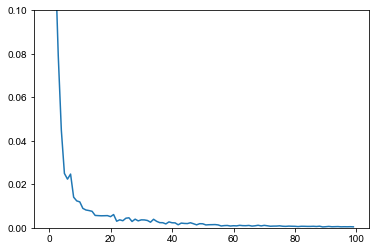

In [192]:
plt.plot(e)
plt.ylim(0,1e-1)

In [115]:
X

,最低,最高,predict
0,20.24,20.66,0
1,20.00,20.38,0
2,18.43,19.99,0
3,17.60,18.99,3
4,17.68,18.07,3
...,...,...,...
275,20.35,20.78,0
276,20.68,21.00,0
277,20.60,20.89,0
278,20.49,20.90,0


In [116]:
get_k(X,5)

ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 1 is required by check_pairwise_arrays.

In [99]:
X.iloc[:,[0,1]]

,最低,最高
0,20.24,20.66
1,20.00,20.38
2,18.43,19.99
3,17.60,18.99
4,17.68,18.07
...,...,...
275,20.35,20.78
276,20.68,21.00
277,20.60,20.89
278,20.49,20.90


In [470]:
# 计算距离
def distance(center,x):
    return np.sqrt(np.sum((np.array(center)-np.array(x))**2))

In [19]:
center = [1,1,1]
x = [0.5,0.5,0.5]

In [20]:
distance(center,x)

0.8660254037844386

In [337]:
indexs = np.random.choice(data.shape[0],2)

In [338]:
indexs

array([258, 107])

In [303]:
data.columns

Index(['    最低', '    最高', 'label'], dtype='object')

In [339]:
centers = data.iloc[indexs,:]

In [305]:
# centers = centers.iloc[:,[0,1]]

In [340]:
centers

,最低,最高,label
258,23.33,23.88,1
107,16.70,17.16,0


In [376]:
np.array([centers[centers.iloc[:,-1]==i] for i in range(X.iloc[-1].nunique()) if i in centers.iloc[:,-1].tolist()]).reshape(2,3)[:,:2]

array([[16.7 , 17.16],
       [23.33, 23.88]])

In [358]:
for i in np.array([centers[centers.iloc[:,-1]==i] for i in range(X.iloc[-1].nunique()) if i in centers.iloc[:,-1].tolist()]):
    print(i)

[[16.7  17.16  0.  ]]
[[23.33 23.88  1.  ]]


In [332]:
for i in range(2):
    print(i[:2])

TypeError: 'int' object is not subscriptable

In [379]:
[centers[centers.iloc[:,-1]==i] for i in range(X.iloc[-1].nunique()) if i in centers.iloc[-1].tolist()]

[         最低      最高  label
 107    16.7   17.16      0]

In [498]:
# 计算评估指标
def evaluation(centers,X): # centers,X为dataframe
    feature = []
    for i in range(X.iloc[-1].nunique()):
        feature.append(X[X.iloc[:,-1]==i].iloc[:,[0,1]])
    centers = [centers[centers.iloc[:,-1]==i] for i in range(X.iloc[-1].nunique()) if i in centers.iloc[:,-1].tolist()]
    E_in_list = [np.sum(distance(center[0][:2],np.array(x)))/len(x) for center,x in zip(np.array(centers),feature)]
    E_in = np.sum(np.array(E_in_list))
    E_out = np.sum(distance(np.array(centers).reshape(-1,3)[:,:2],np.array(centers).mean(axis=0)[0][:2]))/np.array(centers).shape[0]
    return E_in/E_out

In [499]:
evaluation(centers,X)

0.12932139718004243

In [307]:
index = data.index.tolist()
for i in indexs:
    index.remove(i)
X = data.iloc[index,:]

In [308]:
X

,最低,最高,label
0,20.24,20.66,0
1,20.00,20.38,0
2,18.43,19.99,0
3,17.60,18.99,0
4,17.68,18.07,0
...,...,...,...
275,20.35,20.78,1
276,20.68,21.00,1
277,20.60,20.89,1
278,20.49,20.90,1


In [270]:
# X.iloc[:,-1].value_counts().index

Int64Index([0, 1], dtype='int64')

In [281]:
# X.iloc[-1].nunique()

2

In [282]:
feature = []

In [283]:
for i in range(X.iloc[-1].nunique()):
    feature.append(X[X.iloc[:,-1]==i].iloc[:,[0,1]])

In [318]:
np.array(feature).shape

(2, 139, 2)

In [319]:
for i in np.array(feature):
    print(i.shape)
    break

(139, 2)


In [294]:
for i in centers:
    print(np.array(i)[:2])
    break

[[18.9  19.98  0.  ]]


In [286]:
centers = [centers[centers.iloc[:,-1]==i] for i in range(X.iloc[-1].nunique())]

In [287]:
centers

[        最低      最高  label
 13    18.9   19.98      0,
          最低      最高  label
 235   23.65   24.72      1]

In [297]:
np.array(centers).mean(axis=0)

array([[21.275, 22.35 ,  0.5  ]])

In [472]:
# 计算样本到聚类中心的距离并分离样本
def Dis(centers,X):
    label = []
    p_pre = []
    for i,x in X.iterrows():
        x_l = []
        for i,center in centers.iterrows():
            x_l.append(distance(center[:2],x[:2]))
        label.append(centers.iloc[:,-1].tolist()[x_l.index(min(x_l))])
        p_pre.append((x.values,min(x_l),centers.iloc[:,-1].tolist()[x_l.index(min(x_l))]))
    return label,p_pre

In [207]:
label,p_pre = Dis(centers,X)

In [208]:
pd.Series(label).value_counts()

0    155
1    123
dtype: int64

In [198]:
p_pre

[(array([20.24, 20.66,  0.  ]), 1),
 (array([20.  , 20.38,  0.  ]), 1),
 (array([18.43, 19.99,  0.  ]), 1),
 (array([17.6 , 18.99,  0.  ]), 1),
 (array([17.68, 18.07,  0.  ]), 1),
 (array([17.78, 18.24,  0.  ]), 1),
 (array([17.24, 18.05,  0.  ]), 1),
 (array([17.18, 18.14,  0.  ]), 1),
 (array([17.66, 18.15,  0.  ]), 1),
 (array([17.6 , 18.07,  0.  ]), 1),
 (array([17.58, 18.05,  0.  ]), 1),
 (array([17.45, 17.9 ,  0.  ]), 1),
 (array([17.84, 19.25,  0.  ]), 1),
 (array([18.9 , 19.98,  0.  ]), 1),
 (array([19.7 , 20.58,  0.  ]), 1),
 (array([19.63, 20.3 ,  0.  ]), 1),
 (array([19.5 , 19.92,  0.  ]), 1),
 (array([19.57, 20.2 ,  0.  ]), 1),
 (array([19.61, 20.22,  0.  ]), 1),
 (array([19.55, 21.2 ,  0.  ]), 1),
 (array([20.02, 20.62,  0.  ]), 1),
 (array([18.7 , 20.07,  0.  ]), 1),
 (array([19.11, 20.05,  0.  ]), 1),
 (array([19.21, 19.97,  0.  ]), 1),
 (array([18.95, 19.47,  0.  ]), 1),
 (array([18.41, 19.26,  0.  ]), 1),
 (array([18.31, 18.88,  0.  ]), 1),
 (array([17.55, 18.29,  0.  

In [266]:
d = pd.DataFrame(p_pre)

In [267]:
d

,0,1,2
0,"[20.24, 20.66, 0.0]",1.502664,0
1,"[20.0, 20.38, 0.0]",1.170470,0
2,"[18.43, 19.99, 0.0]",0.470106,0
3,"[17.6, 18.99, 0.0]",1.634044,0
4,"[17.68, 18.07, 0.0]",2.266385,0
...,...,...,...
273,"[20.35, 20.78, 1.0]",1.656050,0
274,"[20.68, 21.0, 1.0]",2.051536,0
275,"[20.6, 20.89, 1.0]",1.928238,0
276,"[20.49, 20.9, 1.0]",1.836981,0


In [509]:
# 按概率选择
def random_pick(some_list, probabilities): 
    x = np.random.uniform(0,1) 
    cumulative_probability = 0.0 
    for item, item_probability in zip(some_list, probabilities): 
        cumulative_probability += item_probability 
        if x < cumulative_probability:
            break 
    return item

In [510]:
# 选择新的聚类点
def choosecenter(p_pre):
    # 按概率选择
    def random_pick(some_list, probabilities): 
        x = np.random.uniform(0,1) 
        cumulative_probability = 0.0 
        for items, item_probability in zip(some_list, probabilities): 
            cumulative_probability += item_probability 
            if x < cumulative_probability:
                break 
        return items
    data = pd.DataFrame(p_pre)
    P_l = []
    newcenter = []
    for i in range(data[2].nunique()):
        P_l.append((data[data[2]==i][1]/data[data[2]==i][1].sum()))
    for i in P_l:
        newcenter.append((random_pick(i.index.tolist(),i.values.tolist()),data.iloc[random_pick(i.index.tolist(),i.values.tolist()),0]))
    return newcenter

In [454]:
a = choosecenter(p_pre)

In [455]:
a

[(99, array([17.14, 17.54,  0.  ])), (202, array([22.85, 24.03,  1.  ]))]

In [414]:
pd.DataFrame(np.array(pd.DataFrame(a)[1]),columns=['最低','最高','label'])

ValueError: Shape of passed values is (2, 1), indices imply (2, 3)

In [428]:
pd.DataFrame(a)[0].tolist()

[43, 208]

In [430]:
centers = pd.DataFrame(columns=['最低','最高','label'])

In [431]:
centers

,最低,最高,label


In [434]:
for i,j in zip(pd.DataFrame(a)[0].tolist(),pd.DataFrame(a)[1].values):
    centers.loc[i] = j

In [435]:
centers

,最低,最高,label
43,16.25,16.54,0.0
208,25.71,27.90,1.0


In [433]:
pd.DataFrame(a)[1].values[0]

array([16.25, 16.54,  0.  ])

In [513]:
def train(data,K):
    global random_pick
    indexs = np.random.choice(data.shape[0],2)
    centers = data.iloc[indexs,:]
    evaluations = []
    center_total = []
    for k in range(K):
        index = data.index.tolist()
        for i in indexs:
            index.remove(i)
        X = data.iloc[index,:]
        evaluation(centers,X)
        label,p_pre = Dis(centers,X)
        result  = choosecenter(p_pre)
        centers = pd.DataFrame(columns=['最低','最高','label'])
        for i,j in zip(pd.DataFrame(result)[0].tolist(),pd.DataFrame(result)[1].values):
            centers.loc[i] = j
        indexs = centers.index.tolist()
#         evaluations.append(evaluation(centers,X))
#         center_total.append(centers)
    return evaluation(centers,X),centers

In [514]:
a,b = train(data,10)

UnboundLocalError: local variable 'items' referenced before assignment

In [458]:
a

0.14526017918455242